In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models,regularizers
import matplotlib.pyplot as plt

In [4]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [5]:
X_train= X_train/255
X_test = X_test/255
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)

In [19]:
def create_model(use_l2=False, use_dropout=False):
    reg = regularizers.l2(0.001) if use_l2 else None
    model = models.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(256, activation='relu', kernel_regularizer=reg),
        layers.Dropout(0.5) if use_dropout else layers.Lambda(lambda x: x),
        layers.Dense(128, activation='relu', kernel_regularizer=reg),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer='adam', 
        loss='sparse_categorical_crossentropy', 
        metrics=['accuracy'])
    return model
histories = {}
configs = {
    "Baseline":create_model(),
    "L2_Regularization":create_model(use_l2 = True),
    "Dropout":create_model(use_dropout = True),
}
for name,model in configs.items():
    print(f"\nTraining:{name}")
    history = model.fit(
        X_train,y_train,
        batch_size = 128,
        epochs = 5,
        validation_data = (X_test,y_test),
        verbose = 2
    )
    histories[name] = history


Training:Baseline
Epoch 1/5
469/469 - 3s - 7ms/step - accuracy: 0.9243 - loss: 0.2649 - val_accuracy: 0.9615 - val_loss: 0.1241
Epoch 2/5
469/469 - 2s - 4ms/step - accuracy: 0.9699 - loss: 0.1010 - val_accuracy: 0.9733 - val_loss: 0.0845
Epoch 3/5
469/469 - 2s - 4ms/step - accuracy: 0.9797 - loss: 0.0665 - val_accuracy: 0.9748 - val_loss: 0.0802
Epoch 4/5
469/469 - 2s - 4ms/step - accuracy: 0.9851 - loss: 0.0486 - val_accuracy: 0.9787 - val_loss: 0.0689
Epoch 5/5
469/469 - 2s - 4ms/step - accuracy: 0.9891 - loss: 0.0352 - val_accuracy: 0.9789 - val_loss: 0.0684

Training:L2_Regularization
Epoch 1/5
469/469 - 3s - 7ms/step - accuracy: 0.9190 - loss: 0.5721 - val_accuracy: 0.9564 - val_loss: 0.3503
Epoch 2/5
469/469 - 2s - 4ms/step - accuracy: 0.9601 - loss: 0.3086 - val_accuracy: 0.9597 - val_loss: 0.2778
Epoch 3/5
469/469 - 2s - 4ms/step - accuracy: 0.9680 - loss: 0.2407 - val_accuracy: 0.9726 - val_loss: 0.2142
Epoch 4/5
469/469 - 2s - 4ms/step - accuracy: 0.9728 - loss: 0.2066 - val

In [32]:
plt.figure(figsize=(50,50))

<Figure size 5000x5000 with 0 Axes>

<Figure size 5000x5000 with 0 Axes>

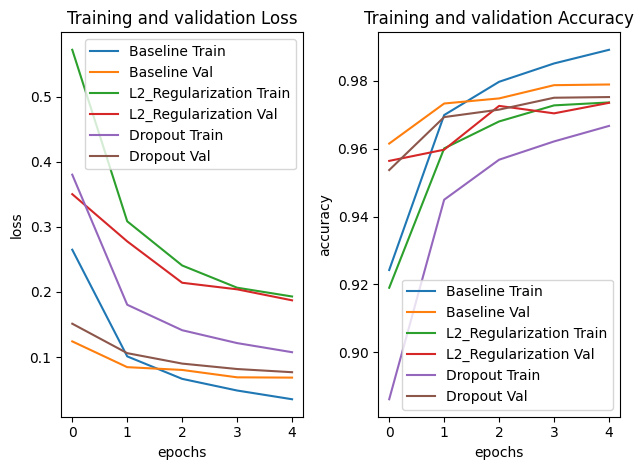

In [33]:
plt.subplot(1,2,1)
for name, history in histories.items():
    plt.plot(history.history['loss'],label=f'{name} Train')
    plt.plot(history.history['val_loss'],label=f'{name} Val')
plt.title('Training and validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
for name, history in histories.items():
    plt.plot(history.history['accuracy'],label=f'{name} Train')
    plt.plot(history.history['val_accuracy'],label=f'{name} Val')
plt.title('Training and validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.tight_layout()
plt.show()